In [1]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
#LOAD DATASET
data = pd.read_csv("../class_06/mushrooms.csv")
data.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#APPLY LABEL ENCODER
le = LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
data = data.values
np.random.shuffle(data)
print(data.shape)

(8124, 23)


In [127]:
ydata = data[:200,0]
xdata = data[:200,1:]
ydata[ydata==0] = -1
print(ydata.shape,xdata.shape)

(200,) (200, 22)


In [128]:
print(np.unique(ydata,return_counts=True))

(array([-1,  1]), array([103,  97]))


In [129]:
xtrain,xval,ytrain,yval= train_test_split(xdata,ydata,test_size=0.2,random_state = 5)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(160, 22)
(40, 22)
(160,)
(40,)


In [130]:
def hypothesis(w,x,b): 
    return np.dot(x,w)+b

In [131]:
def loss(x,y,w,b,c):
    los = 0
    los += 0.5*np.dot(w,w.T)
    ti = np.multiply(y,hypothesis(w,x,b))
    ti = 1-ti
    ## only keeping ti>0
    ti = ti[ti>0]
    los += np.sum(ti)
    return los

In [132]:
def grad(x,y,w,b,c):
    
    n_features = x.shape[1]
    
    gradw = np.zeros((n_features,))
    gradb = 0
    ti = np.multiply(y, hypothesis(w, x, b))
    for ix in range(n_features):
        gradw[ix] = w[ix]
        for jx in range(ti.shape[0]):
            if ti[jx]>1:
                gradw[ix] += 0
            else:
                gradw[ix] -= c*x[jx][ix]*y[jx]
       
    for jx in range(ti.shape[0]):
        if ti[jx]>1:
            gradb += 0
        else:
            gradb -= c*y[jx]
    
    return gradw,gradb

In [143]:
def gradientDescend(x,y,epochs =1500,lr = 0.0001,c=1):
    
    n_features = x.shape[1]
    
    losses = []
    w = np.random.randn(n_features,)
    b = 0
    
    for ix in range(epochs):
        losses.append(loss(x,y,w,b,c))
        gradw, gradb = grad(x,y,w,b,c)        
        w = w - lr*gradw
        b = b - lr*gradb
    return w,b,losses

In [144]:
w,b,losses = gradientDescend(xtrain,ytrain)

In [145]:
def accuracy(yact,xval):
    ypred = hypothesis(w,xval,b)
    ypred[ypred>=0] = 1
    ypred[ypred<0] = -1
    acc = np.sum(yact==ypred)/yact.shape[0]
    return acc

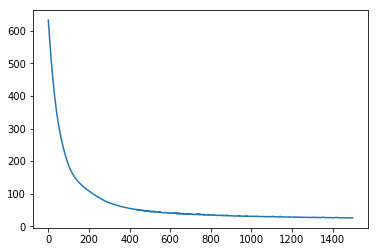

In [146]:
#plot loss
temp = np.arange(len(losses))
plt.figure(0)
plt.plot(temp,np.array(losses))

In [147]:
print(accuracy(yval,xval))

0.95


# Using Sklearn

In [148]:
from sklearn.svm import SVC

In [149]:
cle = SVC()
cle.fit(xtrain,ytrain)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [150]:
cle.score(xval,yval)

0.97499999999999998